# PINGDINDSHAN'S NUMBER 


## FUNKCIJA PDS

In [15]:
#%%cython
# Hitrejsa razlicica stetja poti - ce ne deluje, odstrani zgornjo vrstico in glej spodaj se v funkciji pds!

from sage.combinat.combination import Combinations
from sage.rings.integer import Integer


def count_paths(G, start, end):
    """
    Presteje poti v neusmerjenem grafu ``G`` od ``start`` do ``end``.

    Koda je povzeta po ``sage.graphs.path_enumeration.all_paths``.
    """
    count_paths = Integer(0)
    act_path = []       # the current path
    act_path_iter = []  # the neighbor/successor-iterators of the current path
    s = start
    while True:
        if s == end:    # if path completes, add to count
            count_paths += Integer(1)
        else:
            if s not in act_path:   # we want vertices just once in a path
                act_path.append(s)  # extend current path
                act_path_iter.append(G.neighbor_iterator(s))  # save the state of the neighbor/successor-iterator of the current vertex
        s = None
        while s is None:
            try:
                s = next(act_path_iter[-1])  # try to get the next neighbor/successor, ...
            except (StopIteration):          # ... if there is none ...
                act_path.pop()               # ... go one step back
                act_path_iter.pop()
            if not act_path:                 # there is no other vertex ...
                return count_paths           # ... so we are done


def pds(G):
    """
    Presteje poti v neusmerjenem grafu ``G``.
    """
    count = G.order()
    for u, v in Combinations(G, 2):
        #count += count_paths(G, u, v) # ce ne deluje s %%cython, zakomentiraj to in odkomentiraj naslednjo vrstico
        count += len(G.all_paths(u, v))
    return count
    

## VSI GRAFI

Spodaj je definirana funkcija ustvari_vse_grafe, ki ustvari vse povezane grafe na $1, \dots ,8$ vozliščih. Funkcija vključi vse neizomorfne grafe.

In [16]:
# Funkcija, ki ustvari generatorje za vse grafe na i=1,...,12 vozliščih. Generator pomeni,
# da je v pomnilniku le navodilo za ustvarjanje grafa, ne pa celoten graf. Zaradi tega je 
# program hitrejši in porabi manj prostora na pomnilniku. Funkcija vrne 12 generatorjev,
# vsak naj bi vrnil vse grafe na i vozliščih ( en generator za vsak i)
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi = gen_vsi_grafi()

## FILTRIRANJE GRAFOV IN ISKANJE MAKSIMALNE VREDNOSTI PDS(G)

## VSI GRAFI

In [17]:
# funkcija, ki gre skozi vse grafe na 1, ... , 8 vozliščih, izračuna njihov PDS in nato ustvari slovar, kjer so
# ključi števila vozlišč, vrednost pa je največji PDS za vsakega od vozlišč izmed vseh grafov s tem številom vozlišč

# program se izvaja dobre 3 minute

def max_pds_vsi():
    max_dict_vsi = {}
    for grafi in gen_vsi_grafi:
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        max_dict_vsi[G.order()] = maks
    return max_dict_vsi

max_dict_vsi = max_pds_vsi()
max_dict_vsi


{1: 1, 2: 3, 3: 9, 4: 34, 5: 165, 6: 981, 7: 6853, 8: 54804}

In [18]:
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi = gen_vsi_grafi()

In [19]:
def pds_vsi():
    slovar_vsi = {} 
    for grafi in gen_vsi_grafi:
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        slovar_vsi[G.order()] = (G, maks)
    return slovar_vsi

pds_vsi = pds_vsi()
pds_vsi

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 9),
 4: (Graph on 4 vertices, 34),
 5: (Graph on 5 vertices, 165),
 6: (Graph on 6 vertices, 981),
 7: (Graph on 7 vertices, 6853),
 8: (Graph on 8 vertices, 54804)}

## DVODELNI GRAFI

In [20]:
# funkcija ustvari generatorje dvodelnih grafov in jih shrani v seznam
def gen_dvodelni_grafi():
   gen_dvodelni = []
   for i in range(1, 11):
      gen_dvodelni.append(graphs.nauty_geng(f"{i} -b"))
   return gen_dvodelni

dvodelni_grafi = gen_dvodelni_grafi()
dvodelni_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f64b90612a0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061e70>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061540>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061690>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b90617e0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061930>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061a80>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061bd0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061d20>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9061fc0>]

In [21]:
def max_pds_dvod():
    max_dict_dvod = {}
    for grafi in gen_dvodelni_grafi():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                max_dict_dvod[G.order()] = maks
    return max_dict_dvod

max_dict_dvod = max_pds_dvod()
max_dict_dvod

{1: 1, 2: 3, 3: 6, 4: 16, 5: 38, 6: 141, 7: 445, 8: 2232, 9: 8859, 10: 55735}

In [22]:
# funkcija, ki ustvari slovar z maksimalnimi vrednostmi PDS in pripadajočim dvodelnim grafom

def pds_dvodelni():
    slovar_dvodelni = {}
    for grafi in gen_dvodelni_grafi():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                slovar_dvodelni[G.order()] = (G, pds(G))
    return slovar_dvodelni


slovar_dvodelni = pds_dvodelni()
slovar_dvodelni

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 38),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 445),
 8: (Graph on 8 vertices, 2232),
 9: (Graph on 9 vertices, 8859),
 10: (Graph on 10 vertices, 55735)}

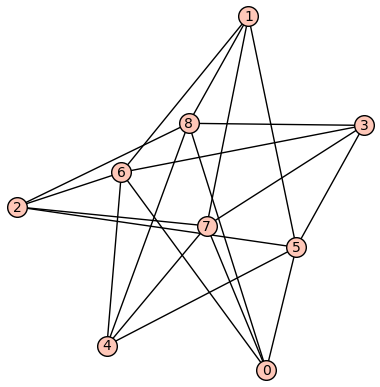

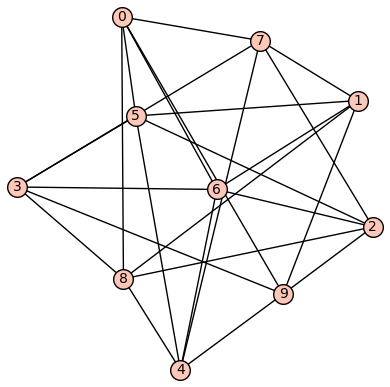

True

In [23]:
G_dvod_9, _ = slovar_dvodelni[9]
G_dvod_9.show()
G_dvod_10, _ = slovar_dvodelni[10]
G_dvod_10.show()	
G_dvod_10.is_triangle_free()

## GRAFI BREZ CIKLOV DOLŽINE TRI

Naslednja funkcija iz množice vseh grafov izbere tiste, ki ne vsebujejo trikotnikov oz. cikov dolžine 3. To stori za vse grafe z 1,...,12 vozlišči

In [24]:
def gen_grafi_brez_trikotnikov():
    gen_brez_trik = []
    for i in range(1, 11):
        gen_brez_trik.append(graphs.nauty_geng(f"{i} -c -t"))
    return gen_brez_trik

grafi_brez_trikotnikov = gen_grafi_brez_trikotnikov()
grafi_brez_trikotnikov

[<generator object GraphGenerators.nauty_geng at 0x7f64b9062ce0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9062110>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b90623b0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9062500>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9062650>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b90627a0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b90628f0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9062a40>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9062e30>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9062f80>]

Naslednja funkcija med grafi poišče max pds v skupini grafov brez trikotnikov.


In [25]:
def max_pds_trik():
    max_dict_trik = {}
    for grafi in gen_grafi_brez_trikotnikov():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
            max_dict_trik[G.order()] = maks
    return max_dict_trik

max_dict_trik = max_pds_trik()

In [26]:
max_dict_trik

{1: 1, 2: 3, 3: 6, 4: 16, 5: 38, 6: 141, 7: 445, 8: 2232, 9: 8859, 10: 55735}

Za vsak graf brez trikotnikov izračunamo pds. Glede na število poti, naslednja funkcija oblikuje slovar, ki vsakemu številu vozlišč od 1 do 12 pripiše preštete poti na vseh grafih s takim številom vozlišč.


In [27]:
# funkcija, ki ustvari slovar z maksimalnimi vrednostmi PDS in grafom

def pds_brez_trikotnikov():
    slovar_brez_trikotnikov = {}
    for grafi in gen_grafi_brez_trikotnikov():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                slovar_brez_trikotnikov[G.order()] = (G, pds(G))
    return slovar_brez_trikotnikov

slovar_brez_trikotnikov = pds_brez_trikotnikov()
slovar_brez_trikotnikov

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 38),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 445),
 8: (Graph on 8 vertices, 2232),
 9: (Graph on 9 vertices, 8859),
 10: (Graph on 10 vertices, 55735)}

#### PRIMERJAVA GRAFOV BREZ TRIKOTNIKOV IN DVODELNIH GRAFOV PRI DOSEGANJU MAKSIMALNIH VREDNOSTI PDS

Kot smo lahko opazili, vsebujeta slovarja grafov brez trikotnikov in dvodelnih grafov enake vrednosti PDS. Poglejmo si še grafe, od katerih je odvisna ta vrednost. Ali so si tudi ti med seboj enaki?

In [28]:
# funkcija preveri ali so vsi grafi, ki so pri obeh skupinah grafov dosegali maksimalne vrednosti PDS med seboj izomorfni in vrne True,
# če pa si katera od grafov med seboj nista enaka vrne False
def preveri_enakost_grafov():
    for i in range(1, 11):
        G_dvod, _ = slovar_dvodelni[i]
        G_brez_trik, _ = slovar_brez_trikotnikov[i]
        if G_dvod.is_isomorphic(G_brez_trik):
            pass
        else:
            return False
    return True

je_enako = preveri_enakost_grafov()
je_enako

True

Kot lahko vidimo, so si prav vsi grafi med seboj izomorfni. Ker pa je množica dvodelnih grafov vsebovana v množici grafov brez trikotnikov, vemo da bo Pingdingshanovo število pri družini grafov brez trikotnikov enako ali kvečjemu večje Pingdingshanovemu številu pri družini dvodelnih grafov. Izkaže pa se, da je za vsako vozlišče natanko enako, kar pomeni, da dvodelni grafi dosegajo maksimalne vrednosti PDS tudi znotraj družine grafov brez trikotnikov.

A zakaj je temu tako? Kakšne so lastnosti dvodelnih grafov, ki jim omogočajo tako veliko PDS število? Zakaj kljub večjim omejitvam dvodelnih grafov (ki izhajajo iz definicije), imajo ti še vedno tako veliko PDS število?

## KUBIČNI GRAFI

Za kubične grafe velja, da imajo vsa vozlišča v takem grafu stopnjo natanko 3 (pravimo jim tudi 3-regularni grafi). Lastnost kubičnih grafov je tudi, da jih lahko dobimo le na sodo mnogo vozliščih. Spodnji funkciji služita generaciji teh grafov na i vozliščih za i=1,...,12 in štetju vseh poti na teh grafih.

In [29]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 15 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f64b9062260>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b90630d0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9063220>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9063370>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b90634c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64b9063610>]

In [37]:
# funkcija, ki izračuna maksimalno št. poti
def max_pds_kub():
    max_dict_kub = {}
    for gen in gen_kub_grafi():
        maks = 0
        for G in gen:
            if pds(G) > maks:
                maks = pds(G)
                max_dict_kub[G.order()] = maks
    return max_dict_kub

max_dict_kub = max_pds_kub()
max_dict_kub

{4: 34, 6: 141, 8: 460, 10: 1375, 12: 3746, 14: 9905}

In [42]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 15 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f64af195d20>,
 <generator object GraphGenerators.nauty_geng at 0x7f64af194580>,
 <generator object GraphGenerators.nauty_geng at 0x7f64af194ac0>,
 <generator object GraphGenerators.nauty_geng at 0x7f64af195e70>,
 <generator object GraphGenerators.nauty_geng at 0x7f64af197220>,
 <generator object GraphGenerators.nauty_geng at 0x7f64af1978b0>]

In [43]:
def pds_kub_grafi():
    slovar_kub_grafi = {}
    for gen in kub_grafi:
        for g in gen:
            if pds(g) == max_dict_kub.get(g.order()):
                slovar_kub_grafi[g.order()]=(g,pds(g))
    return slovar_kub_grafi

slovar_kub_grafi= pds_kub_grafi()
slovar_kub_grafi

{4: (Graph on 4 vertices, 34),
 6: (Graph on 6 vertices, 141),
 8: (Graph on 8 vertices, 460),
 10: (Graph on 10 vertices, 1375),
 12: (Graph on 12 vertices, 3746),
 14: (Graph on 14 vertices, 9905)}

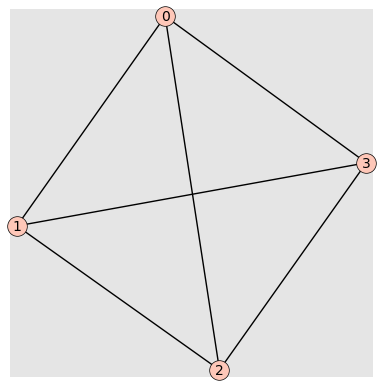

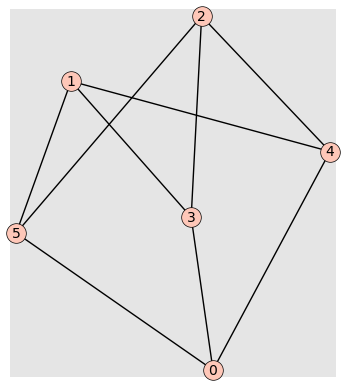

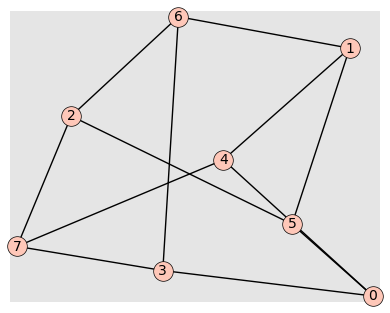

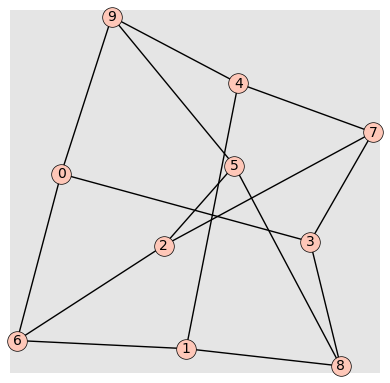

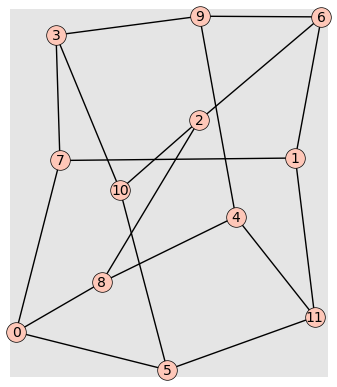

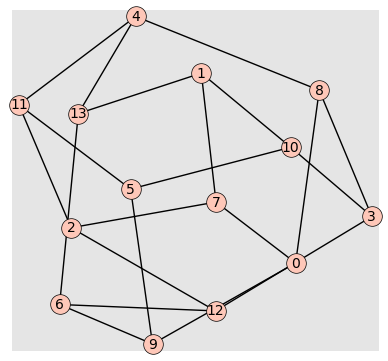

In [62]:
# risanje grafov
kub_4,_ = slovar_kub_grafi[4]
kub_4.show()
kub_6,_ = slovar_kub_grafi[6]
kub_6.show()
kub_8,_ = slovar_kub_grafi[8]
kub_8.show()
kub_10,_ = slovar_kub_grafi[10]
kub_10.show()
kub_12,_ = slovar_kub_grafi[12]
kub_12.show()
kub_14,_ = slovar_kub_grafi[14]
kub_14.show()
# kub_16,_ = slovar_kub_grafi[16]
# kub_16.show()

In [57]:
kub_4.is_bipartite()


False

In [56]:
kub_6.is_bipartite()

True

In [58]:
kub_8.is_bipartite()

False

In [59]:
kub_10.is_bipartite()

False

In [60]:
kub_12.is_bipartite()

False

## POVZETEK PRVE TOČKE


V zgornji kodi sva s pomočjo nauty.geng metod poiskala grafe v posameznih družinah, ki imajo na i=1,...,8 vozliščih (za kubične na 4,6,8) največje števlo pds. 

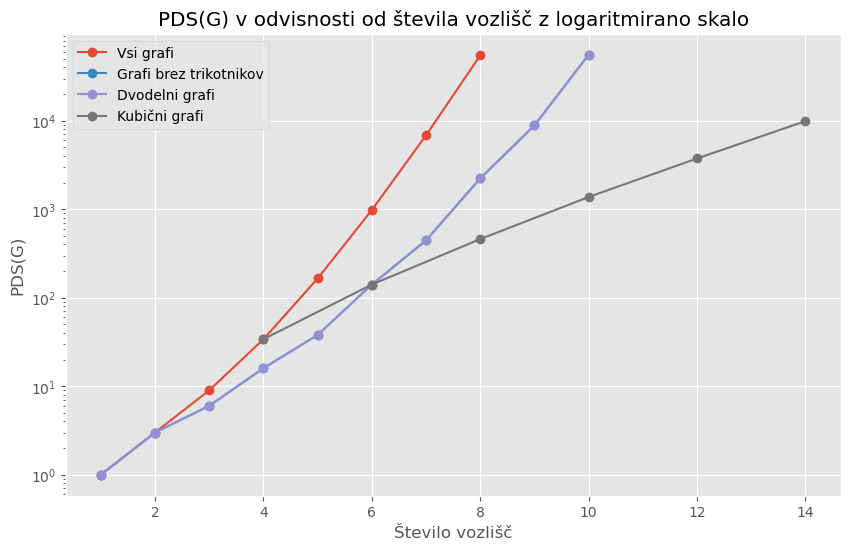

In [33]:
# funkcija za vhodne podatke vzame štiri slovarje, ki vsebuje maksimalno PDS število na vsakem vozlišču
# za vsakega od štirih tipov grafiv, ki sva jih znotraj naloge obravnavala in nato izriše te vrednosti
import matplotlib.pyplot as plt

def graf_pds(vsi, trik, dvod, kub):
    x_1, y_1 = list(vsi.keys()), list(vsi.values())
    x_2, y_2 = list(trik.keys()), list(trik.values())
    x_3, y_3 = list(dvod.keys()), list(dvod.values())
    x_4, y_4 = list(kub.keys()), list(kub.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Vsi grafi')
    plt.plot(x_2, y_2, marker='o', label='Grafi brez trikotnikov')
    plt.plot(x_3, y_3, marker='o', label='Dvodelni grafi')
    plt.plot(x_4, y_4, marker='o', label='Kubični grafi')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('PDS(G)')
    plt.yscale('log')
    plt.title('PDS(G) v odvisnosti od števila vozlišč z logaritmirano skalo') 
    plt.legend()
    plt.grid(True)
    plt.show()
    

graf_pds(max_dict_vsi, max_dict_trik, max_dict_dvod, max_dict_kub)

Za kubične grafe velja, da ima vsako vozlišče stopnjo natanko 3. Iz tega sledi, da je število povezav v kubičnem grafu na i vozliščih natanko 3*i/2 povezav. To se ujema z vrednostmi v slovarju, a je v tem primeru pds število neodvisno od števila povezav v grafu?

## STOHASTIČNA ANALIZA

In [35]:
import random
from sage.all import *
from sage.graphs.graph_generators import graphs

def stohasticna(iteracije = 10, bipartite_size = (5, 5), prob = 0.5):
    dict = {}
    G = graphs.RandomBipartite(bipartite_size[0], bipartite_size[1], prob)
            
    for i in range(iteracije):
        if random.randint(0, 1) == 0:
            while True:
                u = random.choice(G.vertices())
                v = random.choice(G.vertices())
                if u != v and not G.has_edge(u, v):
                    G.add_edge(u, v)
                    transformacija = 'Dodaj'
                    break
        else:
            if G.num_edges() > 0:
                edge = random.choice(list(G.edges()))
                G.delete_edge(edge)
                transformacija = 'Odstrani'
            else:
                continue  
        
        dict[i] = (G, pds(G), transformacija)    
            

test = stohasticna()
test



AttributeError: 'function' object has no attribute 'randint'

Stohastične analize se bova lotila tako, da bova grafom z maksimalnim pds-jem odstanila naključno povezavo in opazovala kako se mu spreminja pds. Najina predspostavka namreč je, da več kot ima graf povezav, višji bo njegov pds. Iz te predpostavke bi sledilo, da bodo najvišje pds.je imeli polni grafi na i vozliščih. pogledala bova razmerja med številom povezav in pds-jem v originalnem grafu in v tistem z odstranjeno povezavo.


Naslednja funkcija namenjena odstranitvi naključne povezave v grafu, ki ni most. Zadnji podatek je ključen, da novo dobljeni graf ostane povezan (pds iščemo zgolj na povezanih grafih).

In [23]:
import random
def odstranitev_povezave(graf):
    if not graf.edges():
        return graf
    else:
        mostovi = set(graf.bridges())
        vse_povezave = set(graf.edges())
        ne_most = vse_povezave - mostovi
        if not ne_most:
            return graf
        else:
            nak_pov = random.choice(list(ne_most))
            graf.delete_edge(nak_pov)
            return graf


: 

: 

In [48]:
def stevilo_povezav(slovar):
    slovar_povezav = {}
    for kljuc in slovar.keys():
        graf,maks = slovar[kljuc]
        slovar_povezav[kljuc]= graf.num_edges()
    return slovar_povezav


In [25]:
def razmerje(stevilo_povezav, slovar_pds):
    razmerja = {}
    for kljuc in stevilo_povezav:
        graf,stevilo = slovar_pds[kljuc]
        razmerja[kljuc] = stevilo_povezav[kljuc] / stevilo

    return razmerja


: 

: 

#### VSI GRAFI

In [26]:
def nov_grafi_vsi():
    spremenjeni_grafi = {}
    for kljuc in pds_vsi:
        graf, pds_grafa = pds_vsi[kljuc]
        kopija = graf.copy()
        nov_graf = odstranitev_povezave(kopija)
        nov_pds = pds(nov_graf)
        spremenjeni_grafi[kljuc] = (nov_graf, nov_pds)
    
    return spremenjeni_grafi


nov_grafi_vsi = nov_grafi_vsi()
nov_grafi_vsi

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 23),
 5: (Graph on 5 vertices, 116),
 6: (Graph on 6 vertices, 720),
 7: (Graph on 7 vertices, 5222),
 8: (Graph on 8 vertices, 43061)}

: 

: 

RAZMERJA:

In [27]:
vsi_grafi_st_povezav = stevilo_povezav(pds_vsi)

: 

: 

In [28]:
razmerje_vsi_grafi = razmerje(vsi_grafi_st_povezav, pds_vsi)
razmerje_vsi_grafi

{1: 0.0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.17647058823529413,
 5: 0.06060606060606061,
 6: 0.01529051987767584,
 7: 0.0030643513789581204,
 8: 0.0005109116122910736}

: 

: 

In [29]:
prilagojeni_vsi_grafi_st_pov = stevilo_povezav(nov_grafi_vsi)

: 

: 

In [30]:
razmerje_prilagojeni_vsi_grafi = razmerje(prilagojeni_vsi_grafi_st_pov, nov_grafi_vsi)
razmerje_prilagojeni_vsi_grafi

{1: 0.0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.21739130434782608,
 5: 0.07758620689655173,
 6: 0.019444444444444445,
 7: 0.0038299502106472617,
 8: 0.0006270174868210213}

: 

: 

#### DVODELNI GRAFI

Tukaj ponovno napišem funkcijo za generiranje dvodelnih grafov in funkcijo, ki vrne slovar dvodelnih grafov, ker je sicer program vračal napako, saj ni prepoznal vrednosti, ki ju ti dve funkciji vrneta.

In [31]:
def gen_dvodelni_grafi():
   gen_dvodelni = []
   for i in range(1,9):
      gen_dvodelni.append(graphs.nauty_geng(f"{i} -b"))
   return gen_dvodelni

dvodelni_grafi = gen_dvodelni_grafi()
dvodelni_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f8204c03b00>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c02e80>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c03240>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c03d80>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c02c00>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c02480>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c039c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f8204c034c0>]

: 

: 

In [32]:
slovar_dvodelni = {
    1:[], 2:[], 3:[], 4:[], 5:[], 6:[],7:[], 8:[]}

def pds_dvodelni():
    for gen in dvodelni_grafi:
        for g in gen:
            if pds(g) == max_dict_dvod.get(g.order()):
                slovar_dvodelni[g.order()] = (g, pds(g))
    return slovar_dvodelni

pds_dvodelni = pds_dvodelni()
pds_dvodelni

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 15),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 124),
 8: (Graph on 8 vertices, 237)}

: 

: 

In [33]:
def nov_grafi_dvod():
    spremenjeni_grafi = {}
    for kljuc in pds_dvodelni:
        graf, pds_grafa = pds_dvodelni[kljuc]
        kopija = graf.copy()
        nov_graf = odstranitev_povezave(kopija)
        nov_pds = pds(nov_graf)
        spremenjeni_grafi[kljuc] = (nov_graf, nov_pds)
    
    return spremenjeni_grafi


nov_grafi_dvod = nov_grafi_dvod()
nov_grafi_dvod


{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 10),
 5: (Graph on 5 vertices, 15),
 6: (Graph on 6 vertices, 88),
 7: (Graph on 7 vertices, 77),
 8: (Graph on 8 vertices, 150)}

: 

: 

RAZMERJA:

In [34]:
vsi_dvod_grafi_st_povezav = stevilo_povezav(pds_dvodelni)

: 

: 

In [35]:
razmerje_vsi_dvod_grafi = razmerje(vsi_dvod_grafi_st_povezav, pds_dvodelni)
razmerje_vsi_dvod_grafi

{1: 0.0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.25,
 5: 0.26666666666666666,
 6: 0.06382978723404255,
 7: 0.07258064516129033,
 8: 0.046413502109704644}

: 

: 

In [36]:
prilagojeni_dvod_grafi_st_pov = stevilo_povezav(nov_grafi_dvod)

: 

: 

In [37]:
razmerje_prilagojeni_dvod_grafi = razmerje(prilagojeni_dvod_grafi_st_pov, nov_grafi_dvod)
razmerje_prilagojeni_dvod_grafi

{1: 0.0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.3,
 5: 0.26666666666666666,
 6: 0.09090909090909091,
 7: 0.1038961038961039,
 8: 0.06666666666666667}

: 

: 

#### GRAFI BREZ TRIKOTNIKOV 

In [38]:
def nov_grafi_trik():
    spremenjeni_grafi = {}
    for kljuc in pds_brez_trikotnikov:
        graf, pds_grafa = pds_brez_trikotnikov[kljuc]
        kopija = graf.copy()
        nov_graf = odstranitev_povezave(kopija)
        nov_pds = pds(nov_graf)
        spremenjeni_grafi[kljuc] = (nov_graf, nov_pds)
    
    return spremenjeni_grafi


nov_grafi_trik = nov_grafi_trik()
nov_grafi_trik


{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 10),
 5: (Graph on 5 vertices, 15),
 6: (Graph on 6 vertices, 88),
 7: (Graph on 7 vertices, 74),
 8: (Graph on 8 vertices, 281)}

: 

: 

##### RAZMERJA:

In [39]:
vsi_grafi_brez_trik_st_povezav = stevilo_povezav(pds_brez_trikotnikov)

: 

: 

In [40]:
razmerje_vsi_grafi_brez_trik = razmerje(vsi_grafi_brez_trik_st_povezav, pds_brez_trikotnikov)
razmerje_vsi_grafi_brez_trik

{1: 0.0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.25,
 5: 0.2,
 6: 0.06382978723404255,
 7: 0.07258064516129033,
 8: 0.02608695652173913}

: 

: 

In [41]:
prilagojeni_grafi_brez_trik_st_pov = stevilo_povezav(nov_grafi_trik)

: 

: 

In [42]:
razmerje_prilagojeni_grafi_brez_trik = razmerje(prilagojeni_grafi_brez_trik_st_pov, nov_grafi_trik)

: 

: 

In [43]:
razmerje_prilagojeni_grafi_brez_trik

{1: 0.0,
 2: 0.3333333333333333,
 3: 0.3333333333333333,
 4: 0.3,
 5: 0.26666666666666666,
 6: 0.09090909090909091,
 7: 0.10810810810810811,
 8: 0.03914590747330961}

: 

: 

Kot vidimo so razmerja narasla. Ker se je število povezav v števcu zmanjšalo samo za 1, moramo velike spremembe v številu razlerja pripisati imenovalcu. Kot vemo bo številka večja, če bo imenovalec manjši iz česar lahko sklepamo da je pds v prilagojenih grafih precej padel.
 
OPOMBA: za vrednosti i=1,2,3,4 se graf ni spremenil, saj so vse povezave v teh grafih mostivi in če bi jih vzeli ven bi naš graf razpadel na več delov. 

#### KUBIČNI GRAFI

OPOMBA: Če kubičnemu grafu odstanimo eno povezavo, ta NI VEČ kubičen, saj dve vozlišči nimate več stopnje tri.

In [44]:
def novi_grafi_kub():
    spremenjeni_grafi = {}
    for kljuc in pds_kub_grafi:
        graf, pds_grafa = pds_kub_grafi[kljuc]
        kopija = graf.copy()
        nov_graf = odstranitev_povezave(kopija)
        nov_pds = pds(nov_graf)
        spremenjeni_grafi[kljuc] = (nov_graf, nov_pds)
    
    return spremenjeni_grafi

novi_grafi_kub = novi_grafi_kub()
novi_grafi_kub

{4: (Graph on 4 vertices, 23),
 6: (Graph on 6 vertices, 80),
 8: (Graph on 8 vertices, 269)}

: 

: 

##### RAZMERJA:


In [50]:
vsi_kub_st_pov = stevilo_povezav(slovar_kub_grafi)
vsi_kub_st_pov

{4: 6, 6: 9, 8: 12, 10: 15, 12: 18, 14: 21}

In [46]:
novi_kub_st_pov = stevilo_povezav(novi_grafi_kub)

: 

: 

In [47]:
razmerje_kub_grafi = razmerje(vsi_kub_st_pov, pds_kub_grafi)
razmerje_kub_grafi

{4: 0.17647058823529413, 6: 0.06666666666666667, 8: 0.026905829596412557}

: 

: 

In [48]:
razmerje_novi_kub_grafi = razmerje(novi_kub_st_pov, novi_grafi_kub)
razmerje_novi_kub_grafi

{4: 0.21739130434782608, 6: 0.1, 8: 0.040892193308550186}

: 

: 

Enako kot pri grafih brez trikotnikov je razmerje naraslo. To ahko razložilmmo na enak način kot zgoraj.

### GRAFIČNI PRIKAZ

Iz vseh zgeneriranih podatkov, lahko zdaj rezultate stohastične metode predstaviva grafično. Narisala bova graf za vsako družino grafov, kjer bova primerjala spremembo PDS.

#### VSI GRAFI

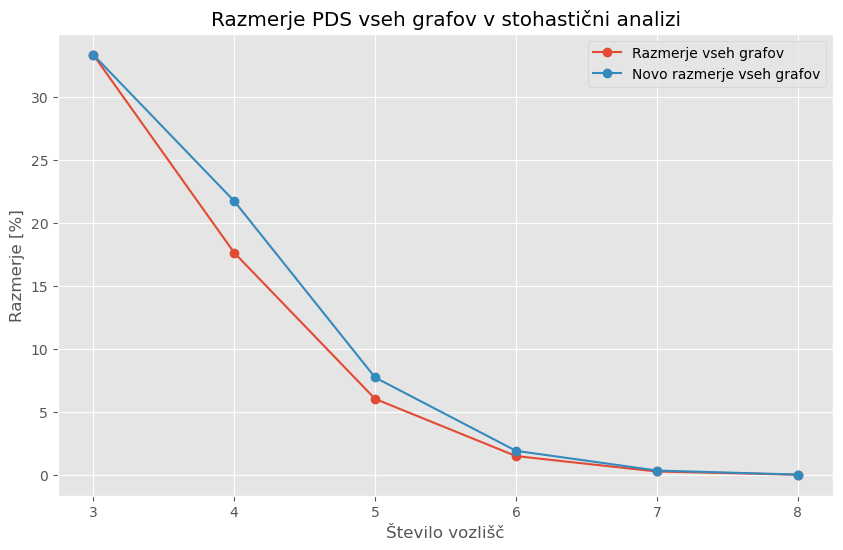

: 

: 

In [49]:
import matplotlib.pyplot as plt

# funkcija iz dveh slovarjev izriše graf, kjer so ključi slovarja na x-osi, vrednosti pa na y-osi

def graf_pds_2(slovar1, slovar2):
    sl1 = {}
    sl2 = {}
    for kljuc in slovar1:
        if kljuc >=3:
            sl1[kljuc] = slovar1[kljuc] * 100
    for kljuc in slovar2:
        if kljuc >=3:
            sl2[kljuc] = slovar2[kljuc] * 100
    x_1, y_1 = list(sl1.keys()), list(sl1.values())
    x_2, y_2 = list(sl2.keys()), list(sl2.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Razmerje vseh grafov')
    plt.plot(x_2, y_2, marker='o', label='Novo razmerje vseh grafov')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('Razmerje [%]')
    plt.title('Razmerje PDS vseh grafov v stohastični analizi') 
    plt.legend()
    plt.grid(True)
    plt.show()

graf_pds_2(razmerje_vsi_grafi, razmerje_prilagojeni_vsi_grafi)
    

#### DVODELNI GRAFI

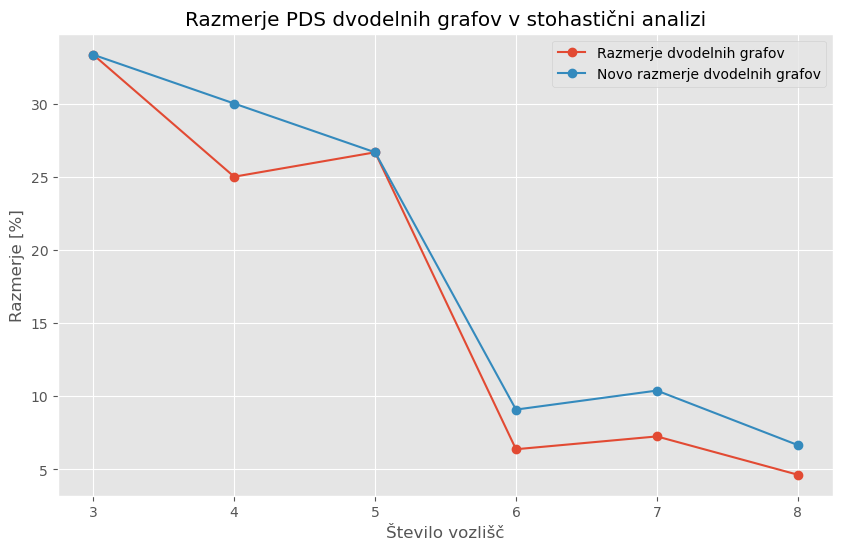

: 

: 

In [50]:
def graf_pds_2(slovar1, slovar2):
    sl1 = {}
    sl2 = {}
    for kljuc in slovar1:
        if kljuc >=3:
            sl1[kljuc] = slovar1[kljuc] * 100
    for kljuc in slovar2:
        if kljuc >=3:
            sl2[kljuc] = slovar2[kljuc] * 100
    x_1, y_1 = list(sl1.keys()), list(sl1.values())
    x_2, y_2 = list(sl2.keys()), list(sl2.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Razmerje dvodelnih grafov')
    plt.plot(x_2, y_2, marker='o', label='Novo razmerje dvodelnih grafov')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('Razmerje [%]')
    plt.title('Razmerje PDS dvodelnih grafov v stohastični analizi') 
    plt.legend()
    plt.grid(True)
    plt.show()

graf_pds_2(razmerje_vsi_dvod_grafi, razmerje_prilagojeni_dvod_grafi)

#### GRAFI BREZ TRIKOTNIKOV

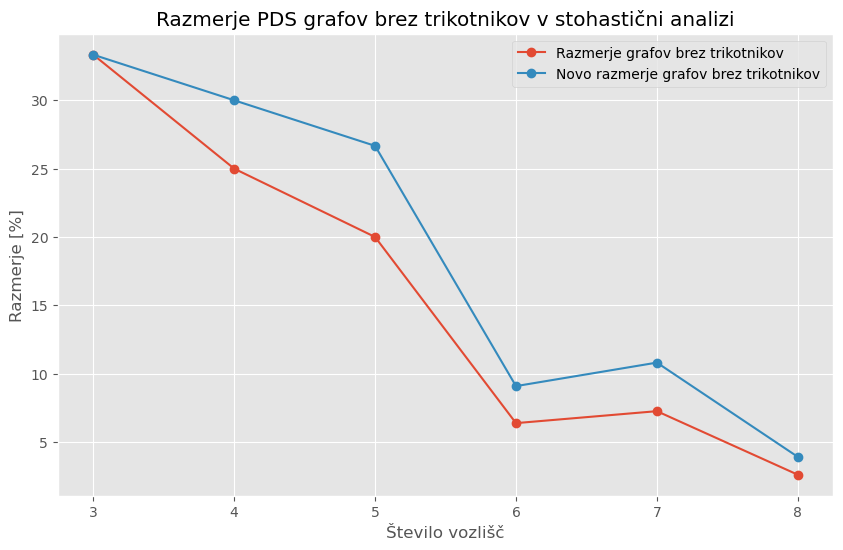

: 

: 

In [51]:
def graf_pds_2(slovar1, slovar2):
    sl1 = {}
    sl2 = {}
    for kljuc in slovar1:
        if kljuc >=3:
            sl1[kljuc] = slovar1[kljuc] * 100
    for kljuc in slovar2:
        if kljuc >=3:
            sl2[kljuc] = slovar2[kljuc] * 100
    x_1, y_1 = list(sl1.keys()), list(sl1.values())
    x_2, y_2 = list(sl2.keys()), list(sl2.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Razmerje grafov brez trikotnikov')
    plt.plot(x_2, y_2, marker='o', label='Novo razmerje grafov brez trikotnikov')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('Razmerje [%]')
    plt.title('Razmerje PDS grafov brez trikotnikov v stohastični analizi') 
    plt.legend()
    plt.grid(True)
    plt.show()

graf_pds_2(razmerje_vsi_grafi_brez_trik, razmerje_prilagojeni_grafi_brez_trik)

#### KUBIČNI GRAFI

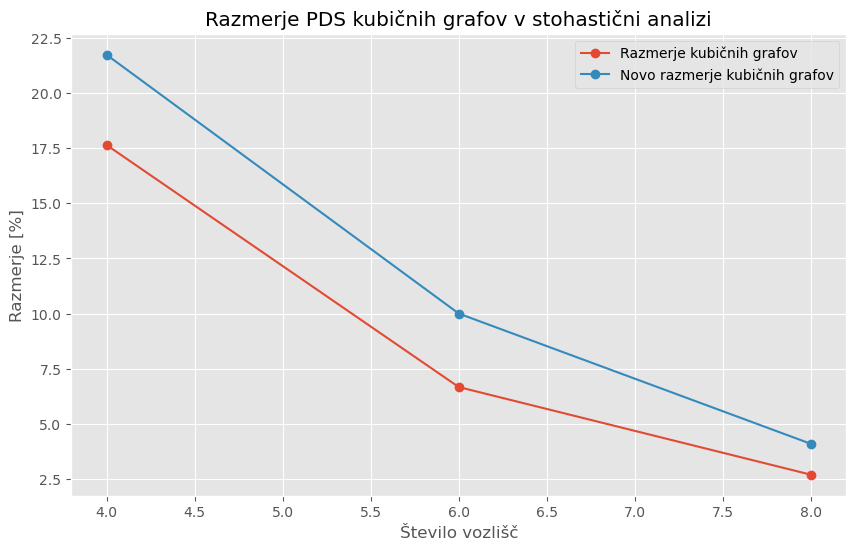

: 

: 

In [52]:
def graf_pds_2(slovar1, slovar2):
    sl1 = {}
    sl2 = {}
    for kljuc in slovar1:
        sl1[kljuc] = slovar1[kljuc] * 100
    for kljuc in slovar2:
        sl2[kljuc] = slovar2[kljuc] * 100
    x_1, y_1 = list(sl1.keys()), list(sl1.values())
    x_2, y_2 = list(sl2.keys()), list(sl2.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Razmerje kubičnih grafov')
    plt.plot(x_2, y_2, marker='o', label='Novo razmerje kubičnih grafov')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('Razmerje [%]')
    plt.title('Razmerje PDS kubičnih grafov v stohastični analizi') 
    plt.legend()
    plt.grid(True)
    plt.show()

graf_pds_2(razmerje_kub_grafi, razmerje_novi_kub_grafi)


### POLNI GRAFI

Najina hipoteza pravi, da več kot ima graf povezav, večje bo njegovo pds število. Da bi se približala potrditvi te najine hipoteze bova pogledala še pds števila polnih grafov na i vozliščih za i=1,2,...8. Te bova primerjala z maksimalnimi pds števili za vse grafe. 

In [53]:
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi = gen_vsi_grafi()

: 

: 

In [54]:
def slovar_polni_grafi():
    slovar ={}
    for gen in gen_vsi_grafi:
        for g in gen:
            graf = Graph(g)  # Pretvori v SageMath graf
            n = graf.order()  # Število vozlišč
            max_edges = n * (n - 1) // 2  # Število povezav v polnem grafu
            if graf.size() == max_edges:  # Preveri, ali ima maksimalno število povezav
                slovar[graf.order()] = (graf, pds(graf))
    return slovar

slovar_polni_grafi = slovar_polni_grafi()

: 

: 

In [55]:
slovar_polni_grafi

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 9),
 4: (Graph on 4 vertices, 34),
 5: (Graph on 5 vertices, 165),
 6: (Graph on 6 vertices, 981),
 7: (Graph on 7 vertices, 6853),
 8: (Graph on 8 vertices, 54804)}

: 

: 